Printing functions:
Function: 2 * x - exp(-x)


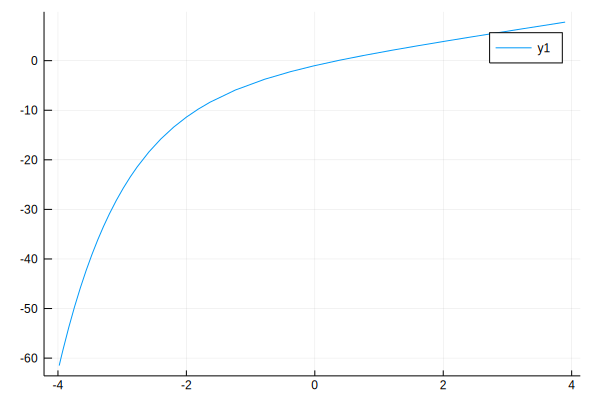


######################################################################################

Function: x * exp(-x)


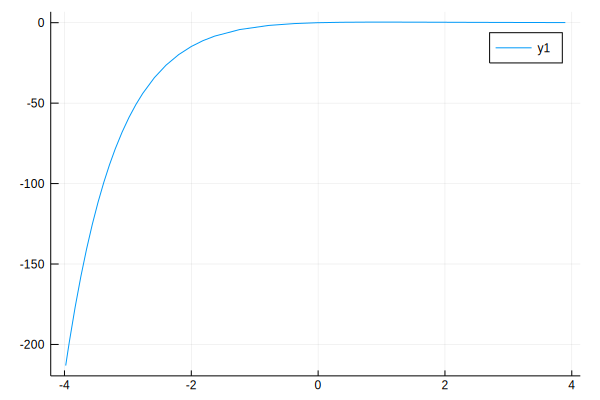


######################################################################################

Function: (x + 3) * (x - 1)^2


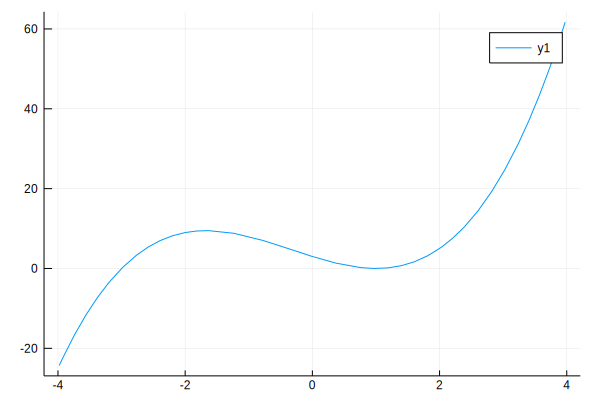


######################################################################################

Function: x^3


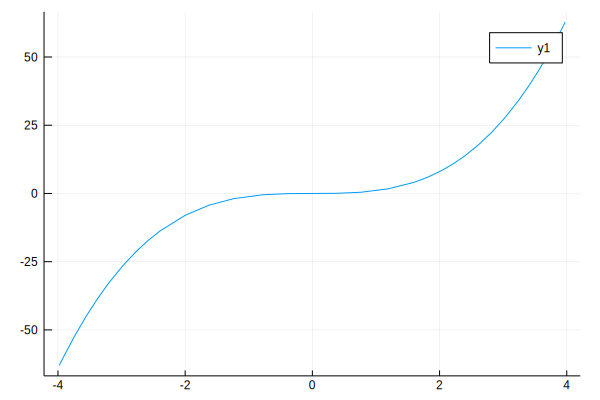


######################################################################################

Function: cos(x) - x


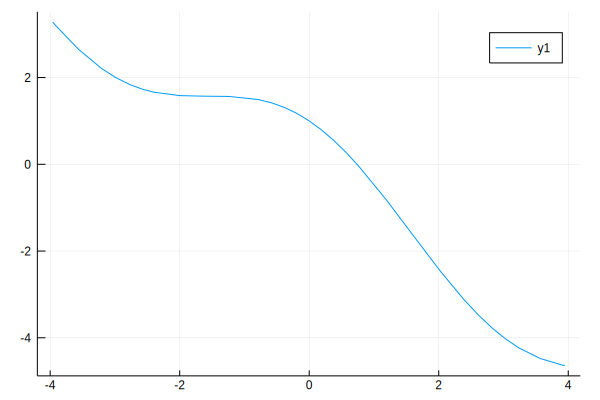


######################################################################################

Function: x^3 - 2*x - 5


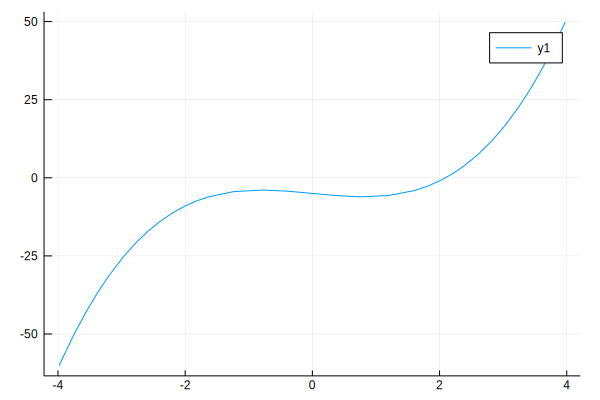


######################################################################################



evaluate_function (generic function with 1 method)

In [12]:
# Task number 1 - 3 methods of finding function roots

# if you're using juliabox - in order to run: Cell -> Run All

using Plots, Roots, ForwardDiff, DataFrames

## using global variables :(

LINES_SEPARATOR = "\n######################################################################################\n"

# function strings

fstr = String[]
push!(fstr, "2 * x - exp(-x)")
push!(fstr, "x * exp(-x)")
push!(fstr, "(x + 3) * (x - 1)^2")
push!(fstr,  "x^3")
push!(fstr, "cos(x) - x")
push!(fstr, "x^3 - 2*x - 5") 
    

# functions

f = Function[]
push!(f, x -> 2 * x - exp(-x))
push!(f, x -> x * exp(-x))
push!(f, x -> (x + 3) * (x - 1)^2)
push!(f, x -> x^3)
push!(f, x -> cos(x) - x)
push!(f, x -> x^3 - 2*x - 5)
        

# derivatives

d = Function[]
for fun in f
    push!(d, x -> ForwardDiff.derivative(fun, float(x)))
end

###################################################################################

function print_functions()
    println("Printing functions:")
    for i in 1:length(f)
        println("Function: ", fstr[i])
        flush(stdout)
        println(LINES_SEPARATOR)
        display(plot(f[i], -4, 4))
    end
end


print_functions()

###################################################################################

function evaluate_function(fun)
    for i in 1:length(f)
        println("Finding root of following function: ", fstr[i], "\n")
        zero = fun(i, f[i], d[i])
        println("f(" , zero, ") = ", f[i](zero))
        println("iszero = ", iszero(f[i](zero)))    
        println(LINES_SEPARATOR)
    end
end

###################################################################################

In [13]:
# bisection

println("Bisection method")

fz_bisection = Float64[]

function bisection_zero(i, fun, derivative)
    zero_ = find_zero(fun, (-4,4), Bisection(), verbose = true)
    push!(fz_bisection, f[i](zero_))
    return zero_
end

evaluate_function(bisection_zero)

Bisection method
Finding root of following function: 2 * x - exp(-x)

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  4.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  4.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  4.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  4.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  4.0000000000000000)
(a_5, b_5) = ( 0.0000000009167707,  4.0000000000000000)
(a_6, b_6) = ( 0.0000605583190918,  4.0000000000000000)
(a_7, b_7) = ( 0.0155639648437500,  4.0000000000000000)
(a_8, b_8) = ( 0.2495117187500000,  4.0000000000000000)
(a_9, b_9) = ( 0.2495117187500000,  0.9990234375000000)
(a_10, b_10) = ( 0.2495117187500000,  0.4992675781250000)
(a_11, b_11) = ( 0.2495117187500000,  0.3741455078125000)
(a_12, b_12) = ( 0.3115

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  4.0000000000000000)

f(0.0) = 0.0
iszero = true

######################################################################################

Finding root of following function: cos(x) - x

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.BisectionExact()
* iterations: 59
* function evaluations: 61
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  4.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  4.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  4.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  4.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  4.0000000000000000)
(a_5, b_5) = ( 0.0000000009167707,  4.0000000000000000)


In [14]:
# Newton's method

println("Newton's method")

fz_newton = Float64[]

function newton_zero(i, fun,der)
    zero_ = find_zero((fun, der), -1, Roots.Newton(), verbose=true)
    push!(fz_newton, f[i](zero_))
    return zero_
end

evaluate_function(newton_zero)

Newton's method
Finding root of following function: 2 * x - exp(-x)

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -4.7182818284590446
x_1 =  0.0000000000000000,	 fx_1 = -1.0000000000000000
x_2 =  0.3333333333333333,	 fx_2 = -0.0498646439071226
x_3 =  0.3516893315554154,	 fx_3 = -0.0001199797491258
x_4 =  0.3517337109929426,	 fx_4 = -0.0000000006927722
x_5 =  0.3517337112491958,	 fx_5 =  0.0000000000000000

f(0.35173371124919584) = 0.0
iszero = true

######################################################################################

Finding root of following function: x * exp(-x)

Results of univariate zero finding:

* Converged to: -8.80999858950826e-27
* Algorithm: Roots.Newton()
* iterations: 7
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using 

In [15]:
# Steffensen's method

println("Steffensen's method\n")

fz_order2 = Float64[]

function steffensen_zero(i, fun,der)
    zero_ = find_zero(fun, -1, Order2(), verbose=true)
    push!(fz_order2, f[i](zero_))
    return zero_
end

evaluate_function(steffensen_zero)

Steffensen's method

Finding root of following function: 2 * x - exp(-x)

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Order2()
* iterations: 6
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -4.7182818284590446
x_1 =  0.0000017443542752,	 fx_1 = -0.9999947669386956
x_2 =  0.2689418489611959,	 fx_2 = -0.2263039947419349
x_3 =  0.3476066362457234,	 fx_3 = -0.0111634120640596
x_4 =  0.3516884669466453,	 fx_4 = -0.0001223172180252
x_5 =  0.3517337117028822,	 fx_5 =  0.0000000012265263
x_6 =  0.3517337112491958,	 fx_6 =  0.0000000000000000

f(0.35173371124919584) = 0.0
iszero = true

######################################################################################

Finding root of following function: x * exp(-x)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Order2()
* iterations: 8
* function evaluations: 12
* stopped as |f(x_n)|

In [16]:
df = DataFrame(
    _________function = fstr, # ____ for DataFrame to look nice
    bisection_value = fz_bisection,
    bisection_iterations = [61, 0, 60, 0, 59, 62],
    bisection_evaluations = [63, 2, 62, 2, 61, 64],
    newton_value = fz_newton,
    newton_iterations = [5, 7, 1, 29, 8, 7],
    newton_evaluations = [11, 15, 3, 59, 17, 15],
    steffensen_value = fz_order2,
    steffensen_iterations = [6, 8, 10, 31, 7, 12],
    steffensen_evaluations = [10, 12, 21, 56, 11, 16]
)

withenv("LINES" => 10, "COLUMNS" => 100) do 
    display(df)
end

,_________function,bisection_value,bisection_iterations,bisection_evaluations,newton_value,newton_iterations
,String,Float64,Int64,Int64,Float64,Int64
1,2 * x - exp(-x),0.0,61,63,0.0,5
2,x * exp(-x),0.0,0,2,-8.81e-27,7
3,(x + 3) * (x - 1)^2,0.0,60,62,0.0,1
4,x^3,0.0,0,2,-4.78697e-16,29
5,cos(x) - x,0.0,59,61,0.0,8
6,x^3 - 2*x - 5,3.55271e-15,62,64,-8.88178e-16,7


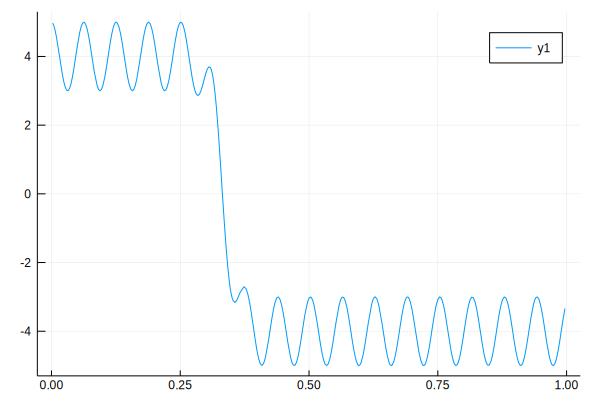

Function: cos( 100.0 * x ) - 4.0 * erf( 30.0 * x - 10.0 )


Results of univariate zero finding:

* Converged to: 0.33186603357456257
* Algorithm: Roots.BisectionExact()
* iterations: 62
* function evaluations: 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.2504882812500000,  0.5004882812500000)
(a_11, b_11) = ( 0.2504882812500000,  0.3753662109375000)
(a_12

0.3318660335745625

In [22]:
# Task number 2 - an example of difficult function for these 3 methods

using Plots, ForwardDiff, SpecialFunctions

# http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html

# 19. f(x) = cos(100*x)-4*erf(30*x-10)


println("Function: cos( 100.0 * x ) - 4.0 * erf( 30.0 * x - 10.0 )\n\n")

function_task_2(x) = cos( 100.0 * x ) - 4.0 * erf( 30.0 * x - 10.0 )


display(plot(function_task_2, 0.0, 1.0))


function_task_2_derivative = x -> ForwardDiff.derivative(function_task_2, float(x))

find_zero(function_task_2, (0, 1.0), Bisection(), verbose = true)

find_zero((function_task_2, function_task_2_derivative), 0.38, Roots.Newton(), verbose = true)

find_zero(function_task_2, 0.38, Order2(), verbose = true)

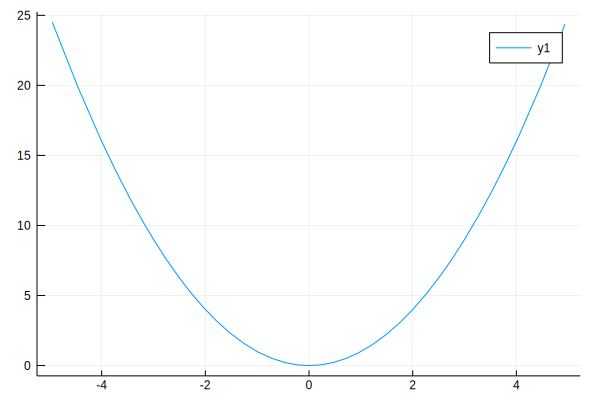

ArgumentError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



In [18]:
# Task number 3a - bisection

using Plots, Roots

bad_function_bisection(x) = x^2

display(plot(bad_function_bisection, -5, 5))

zero_result_bisection = find_zero(bad_function_bisection, (-5, 5), Bisection(), verbose = true)

println("f(" , zero_result_bisection, ") = ", bad_function_bisection(zero_result_bisection))

println("iszero = ", iszero(bad_function_bisection(zero_result_bisection)))  

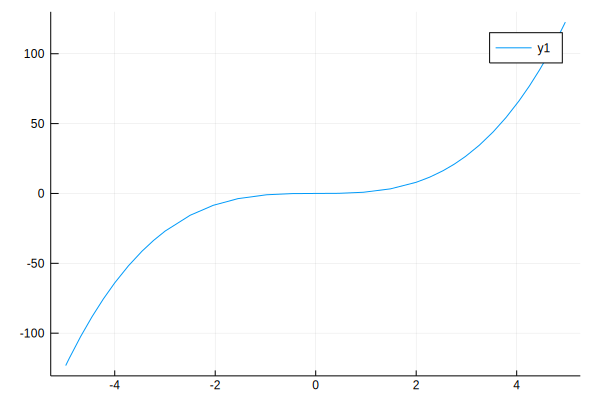

Results of univariate zero finding:

* Converged to: -7.822642576269843e-6
* Algorithm: Roots.Newton()
* iterations: 29
* function evaluations: 59
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 = -0.6666666666666667,	 fx_1 = -0.2962962962962964
x_2 = -0.4444444444444445,	 fx_2 = -0.0877914951989026
x_3 = -0.2962962962962963,	 fx_3 = -0.0260122948737489
x_4 = -0.1975308641975309,	 fx_4 = -0.0077073466292589
x_5 = -0.1316872427983539,	 fx_5 = -0.0022836582605212
x_6 = -0.0877914951989026,	 fx_6 = -0.0006766394845989
x_7 = -0.0585276634659351,	 fx_7 = -0.0002004857732145
x_8 = -0.0390184423106234,	 fx_8 = -0.0000594031920635
x_9 = -0.0260122948737489,	 fx_9 = -0.0000176009457966
x_10 = -0.0173415299158326,	 fx_10 = -0.0000052150950508
x_11 = -0.0115610199438884,	 fx_11 = -0.0000015452133484
x_12 = -0.0077073466292589,	 fx_12 = -0.0000004578409921
x_13 = -0.0051382310861726,	 fx_13 = -0.00000013565659

In [19]:
# Task number 3a - Newton's method

using Plots, Roots, ForwardDiff

bad_function_newton(x) = x^3

display(plot(bad_function_newton, -5, 5))

bad_function_newton_derivative = x -> ForwardDiff.derivative(bad_function_newton, float(x))

zero_result_newton = find_zero((bad_function_newton, bad_function_newton_derivative), -1, Roots.Newton(), verbose = true)

println("f(" , zero_result_newton, ") = ", bad_function_newton(zero_result_newton))

println("iszero = ", iszero(bad_function_newton(zero_result_newton)))   

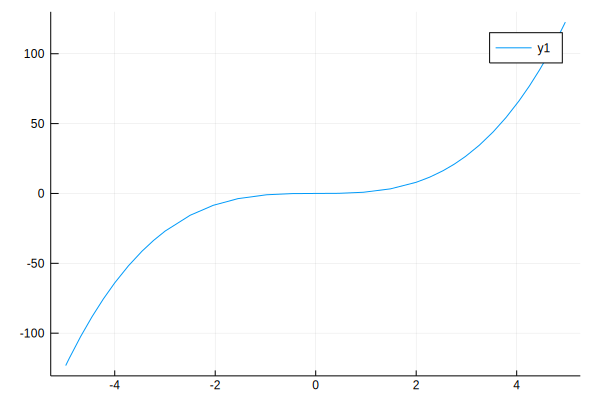

Results of univariate zero finding:

* Converged to: -8.496725161716299e-6
* Algorithm: Order2()
* iterations: 31
* function evaluations: 56
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 = -0.6666646481619485,	 fx_1 = -0.2962936049648208
x_2 = -0.5263147326927622,	 fx_2 = -0.1457929692901063
x_3 = -0.3903549686417063,	 fx_3 = -0.0594811196591394
x_4 = -0.2966593865295631,	 fx_4 = -0.0261080408112663
x_5 = -0.2233605430884194,	 fx_5 = -0.0111434423527916
x_6 = -0.1687782942777193,	 fx_6 = -0.0048078374984879
x_7 = -0.1273580055099287,	 fx_7 = -0.0020657546904808
x_8 = -0.0961539311642222,	 fx_8 = -0.0008889987165791
x_9 = -0.0638044528882613,	 fx_9 = -0.0002597484514387
x_10 = -0.0424494836431578,	 fx_10 = -0.0000764922147300
x_11 = -0.0282741276994024,	 fx_11 = -0.0000226030812122
x_12 = -0.0188418800888136,	 fx_12 = -0.0000066891772915
x_13 = -0.0125590231389601,	 fx_13 = -0.0000019809229419
x_1

In [20]:
# Task number 3a - Steffensens's method


bad_function_steffensen(x) = x^3

display(plot(bad_function_steffensen, -5, 5))

zero_result_steffensen = find_zero(bad_function_steffensen, -1, Order2(), verbose = true)

println("f(" , zero_result_steffensen, ") = ", bad_function_steffensen(zero_result_steffensen))

println("iszero = ", iszero(bad_function_steffensen(zero_result_steffensen)))   

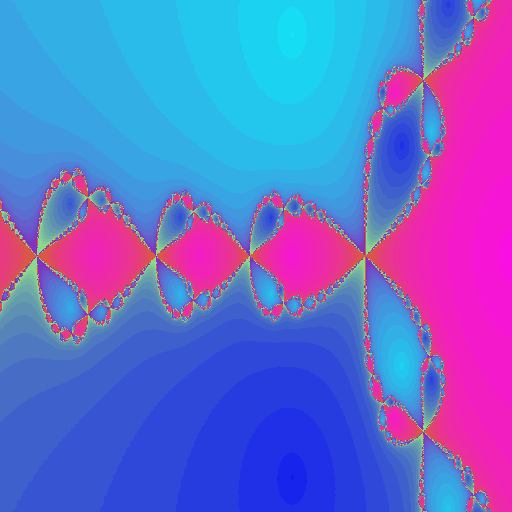

In [53]:
# Task number 3b - Newton fractal

# https://en.wikipedia.org/wiki/Newton_fractal

# function: z^3 - 2z + 2

using Images

f_n(z) = z^3 - 1 
f_n_derivative(z) = 3z^2

roots = [
    (1 + 0im),
    (-.5 + sqrt(3)/2im),
    (-.5 - sqrt(3)/2im)
]

image_height = 512
image_width = 512


tolerance = 0.00000001

next_z_function = z -> z - (f_n(z) / f_n_derivative(z))        # x.n+1 = x.n - f(x.n) / f'(x.n)

number_of_iterations = 150


function get_depending_color(root_number, iteration)
    tmp_iterations = 18
    
    iteration = clamp(iteration, 1, tmp_iterations)

    divide_res = iteration / tmp_iterations
    
    
    if(root_number == 1)
        return RGB(1 - 0.15 * divide_res, 0.35 * divide_res, 1 - 0.74 * divide_res)
    end
    
    if(root_number == 2)
        return RGB(0.5 * divide_res, 1 - 0.8 * divide_res, 1 - 0.25 * divide_res)
    end
    
    if(root_number == 3)
        return RGB(0.55 * divide_res, 0.85 * divide_res, 1 - 0.45 * divide_res)
    end
                
    return RGB(0, 1, 0)
end
            

function get_color(x, y, next_z_function_arg)
    zx = -2.5 + 3.5 * ((x - 1) / (image_width - 1))
    zy = -1 + 2 * ((y - 1) / (image_height - 1))
                
    z = zx + zy * im

    for iteration in 1:number_of_iterations
        z = next_z_function(z)
                    
        for j = 1:length(roots)
            difference = z - roots[j]
                        
            if abs(difference.re) < tolerance && abs(difference.im) < tolerance
                return get_depending_color(j, iteration)
            end
        end
    end    
                
    return get_depending_color(0, 0)
end

            
function print_image()
    image = zeros(RGB, image_height, image_width)
                
    for x = 1:image_width
        for y = 1:image_height
           image[y,x] = get_color(x, y, next_z_function)
        end
    end
    
    image
end
            
            
print_image()
            